# a) Find the mean and standard deviation of returns for these five stocks.

In [1]:
import pandas as pd

In [2]:
# Load the uploaded CSV file
file_path = './Stocks_ClosePrice.csv'
stocks_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the data to understand its structure
stocks_data.head()

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506


In [4]:
return_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']

# 過濾掉缺失值
returns_data = stocks_data[return_columns].dropna()

# 計算每隻股票的平均收益和標準差
mean_returns = returns_data.mean()
std_returns = returns_data.std()

# 將結果整理成數據框顯示
mean_std_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns
})

# 顯示結果
mean_std_df


,Mean Return,Standard Deviation
FB.1,0.000555,0.020943
GOOG.1,0.000189,0.018474
NFLX.1,-0.001250,0.027119
AMZN.1,-0.000302,0.022313
AAPL.1,-0.000056,0.020421


# b) Plot the mean and risk (standard deviation) for these five returns using red stars in a 2-dimensional plane

In [6]:
# Extract return columns
return_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']
returns_data = stocks_data[return_columns].dropna()

# Calculate mean and standard deviation for each stock's returns
mean_returns = returns_data.mean()
std_returns = returns_data.std()

# Create a DataFrame to display results
mean_std_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns
})

In [8]:
print(mean_std_df)

        Mean Return  Standard Deviation
FB.1       0.000555            0.020943
GOOG.1     0.000189            0.018474
NFLX.1    -0.001250            0.027119
AMZN.1    -0.000302            0.022313
AAPL.1    -0.000056            0.020421


In [9]:
from IPython.display import display
display(mean_std_df)


,Mean Return,Standard Deviation
FB.1,0.000555,0.020943
GOOG.1,0.000189,0.018474
NFLX.1,-0.001250,0.027119
AMZN.1,-0.000302,0.022313
AAPL.1,-0.000056,0.020421


In [10]:
import matplotlib.pyplot as plt

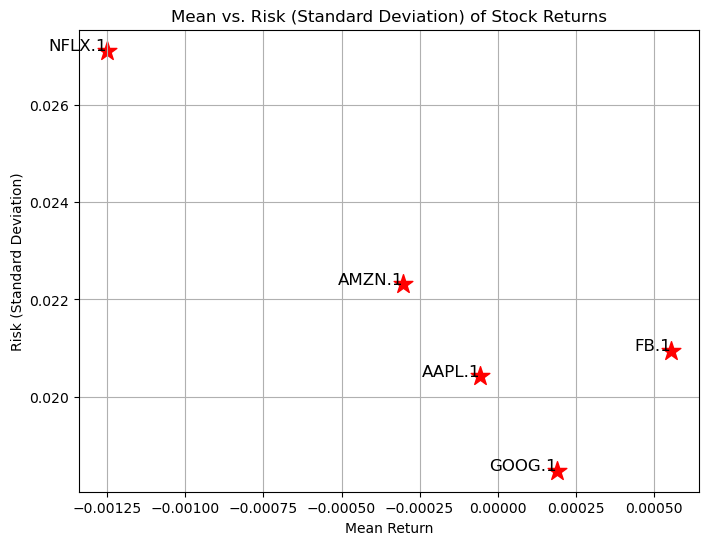

In [11]:
mean_returns = returns_data.mean()
std_returns = returns_data.std()

# 創建 2D 平面圖
plt.figure(figsize=(8, 6))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200)

# 為每個點標註股票名稱
for i, stock in enumerate(return_columns):
    plt.text(mean_returns[i], std_returns[i], stock, fontsize=12, ha='right')

# 添加標籤和標題
plt.title('Mean vs. Risk (Standard Deviation) of Stock Returns')
plt.xlabel('Mean Return')
plt.ylabel('Risk (Standard Deviation)')
plt.grid(True)

# 顯示圖表
plt.show()

# c) Randomly select weights so that each weight is nonnegative and sums to 1. Print these random weights, and calculate the portfolio's mean return and standard deviation.


In [15]:
import numpy as np

# Randomly generate weights for the five stocks that sum to 1
weights = np.random.random(len(return_columns))
weights /= np.sum(weights)

# Calculate portfolio mean and standard deviation
portfolio_mean = np.dot(weights, mean_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns_data.cov(), weights)))

# Display the results
print("Random Weights:", weights)
print("Portfolio Mean Return:", portfolio_mean)
print("Portfolio Standard Deviation:", portfolio_std)


Random Weights: [0.17653385 0.33368982 0.28939686 0.15589538 0.0444841 ]
Portfolio Mean Return: -0.00025025949259581496
Portfolio Standard Deviation: 0.018928858220715918


# d) Repeat c for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane.

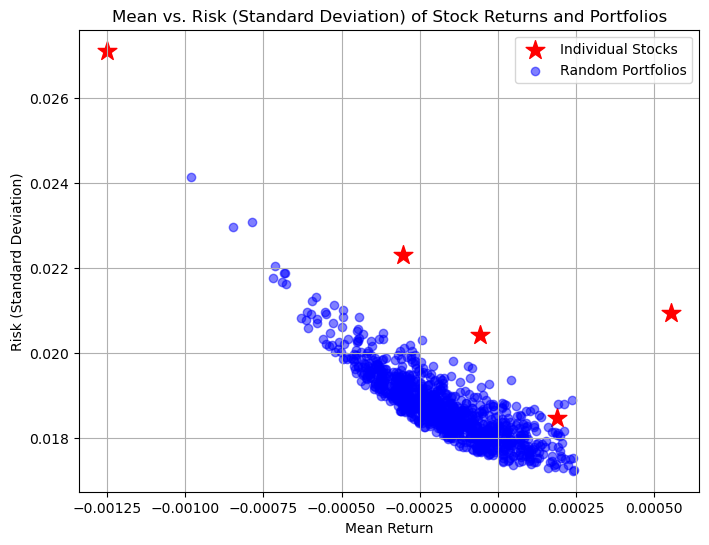

In [16]:
# Generate 1000 random portfolios
n_portfolios = 1000
portfolio_means = []
portfolio_stds = []

for _ in range(n_portfolios):
    # Generate random weights
    weights = np.random.random(len(return_columns))
    weights /= np.sum(weights)
    
    # Calculate portfolio mean and standard deviation
    portfolio_mean = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns_data.cov(), weights)))
    
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

# Plot the portfolios along with the individual stocks
plt.figure(figsize=(8, 6))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200, label='Individual Stocks')
plt.scatter(portfolio_means, portfolio_stds, color='blue', alpha=0.5, label='Random Portfolios')

# Add labels and title
plt.title('Mean vs. Risk (Standard Deviation) of Stock Returns and Portfolios')
plt.xlabel('Mean Return')
plt.ylabel('Risk (Standard Deviation)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# e) Assuming no short sales are allowed, draw the efficient frontier in the figure of b.

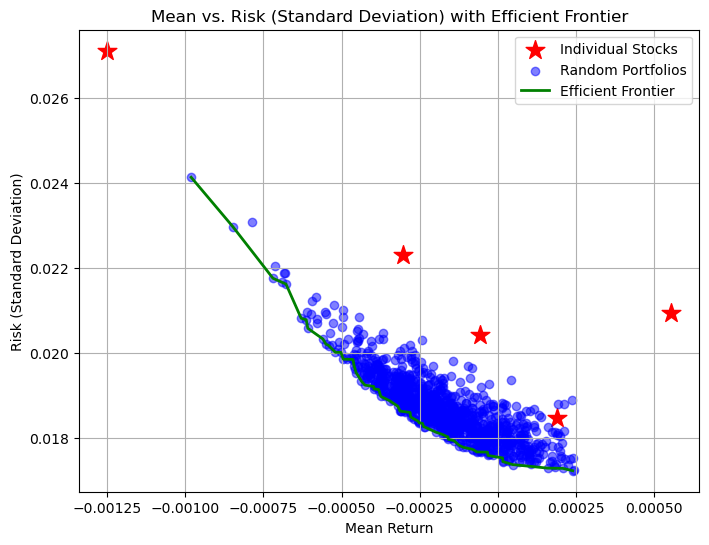

In [17]:
# To find the efficient frontier, we focus on portfolios with the lowest standard deviation for a given mean return

# Convert lists to arrays for easier processing
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Sort portfolios by mean return and find the minimum std for each unique mean return
sorted_indices = np.argsort(portfolio_means)
sorted_means = portfolio_means[sorted_indices]
sorted_stds = portfolio_stds[sorted_indices]

# Calculate the efficiency frontier by filtering portfolios with minimum std for a given mean return
efficient_frontier_means = []
efficient_frontier_stds = []

for i in range(len(sorted_means)):
    if i == 0 or sorted_stds[i] < min(efficient_frontier_stds):
        efficient_frontier_means.append(sorted_means[i])
        efficient_frontier_stds.append(sorted_stds[i])

# Plot the efficient frontier
plt.figure(figsize=(8, 6))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200, label='Individual Stocks')
plt.scatter(portfolio_means, portfolio_stds, color='blue', alpha=0.5, label='Random Portfolios')
plt.plot(efficient_frontier_means, efficient_frontier_stds, color='green', linewidth=2, label='Efficient Frontier')

# Add labels and title
plt.title('Mean vs. Risk (Standard Deviation) with Efficient Frontier')
plt.xlabel('Mean Return')
plt.ylabel('Risk (Standard Deviation)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
